# Projeto de Filtro FIR Passa-Baixa com Janela de Kaiser

## Introdução

Filtros FIR (Finite Impulse Response) são amplamente utilizados devido à sua estabilidade e fase linear. Neste trabalho, projetamos um filtro FIR passa-baixa usando o método da janela de Kaiser, garantindo:

- Atenuação na banda rejeitada ≥ 50 dB
- Frequência de corte: ωc = π/2
- Região de transição: Δω < 0,1π

Para isso, empregamos a biblioteca SciPy para calcular a resposta do filtro e suas transformações.

## Filtro FIR Passa-Baixa

O filtro será projetado pelo método da janela, usando a janela de Kaiser, que permite controlar a transição e atenuação com o parâmetro β.

### Cálculo do Parâmetro β

O valor de β depende da atenuação desejada:

<img src="https://github.com/JoseRaimundo27/FiltroFIR/blob/main/images/CalculoBeta.png?raw=1" />

In [ ]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Parâmetros do filtro
atenuacao_desejada = 50  # dB
frequencia_corte = np.pi / 2  # ωc = π/2
largura_transicao = 0.1 * np.pi  # Δω < 0,1π

# Cálculo do parâmetro β
beta = 0.5842 * (atenuacao_desejada - 21) ** 0.4 + 0.07886 * (atenuacao_desejada - 21)

print(f"Parâmetro β calculado: {beta}")

Parâmetro β calculado: 4.533514120981248


### Projeto do Filtro

Com o valor de β calculado, podemos projetar o filtro FIR passa-baixa usando a janela de Kaiser. A seguir, apresentamos o código para projetar o filtro e plotar sua resposta em frequência.

O valor de M será:

<img src="https://github.com/JoseRaimundo27/FiltroFIR/blob/main/images/CalculoM.png?raw=1" />

In [60]:
# Cálculo da ordem M do filtro (num_taps)

M = 60
#int(np.ceil((atenuacao_desejada - 8) / (2.285 * largura_transicao)))
print(f"Parâmetro M calculado: {M}")


Parâmetro M calculado: 60


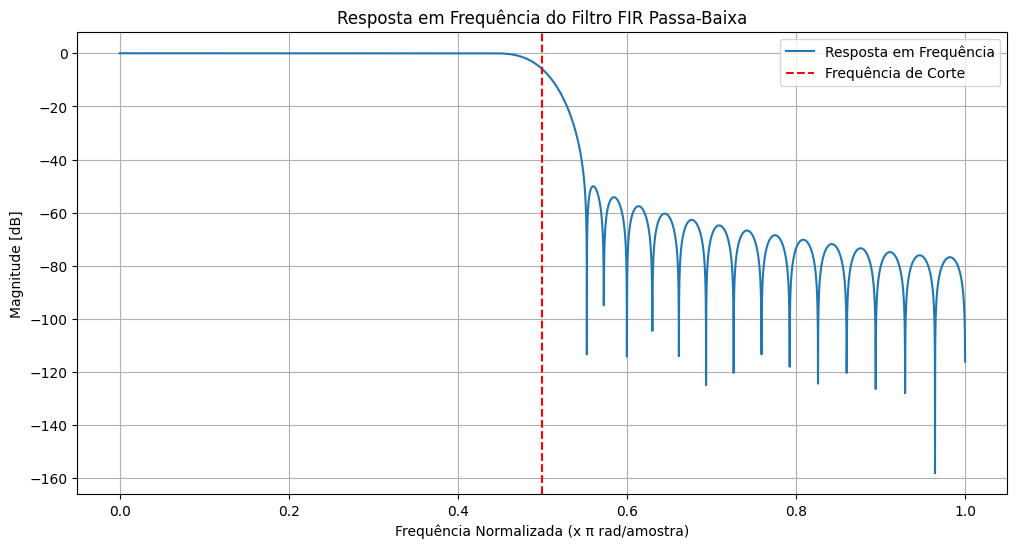

In [61]:


# Projeta o filtro FIR
h_fir = signal.firwin(M, frequencia_corte / np.pi, window=('kaiser', beta), scale=False)

h_fir/=np.sum(h_fir)

# Resposta em frequência do filtro
frequencias, resposta = signal.freqz(h_fir, worN=8000)

# Plot da resposta em frequência
plt.figure(figsize=(12, 6))
plt.plot(frequencias / np.pi, 20 * np.log10(np.abs(resposta)), label='Resposta em Frequência')

# Configuração do gráfico
plt.title('Resposta em Frequência do Filtro FIR Passa-Baixa')
plt.xlabel('Frequência Normalizada (x π rad/amostra)')
plt.ylabel('Magnitude [dB]')
plt.grid(True)
plt.axvline(frequencia_corte / np.pi, color='red', linestyle='--', label='Frequência de Corte')
plt.legend()
plt.show()


### Implementação nas Formas Direta e em Cascata

A *forma direta* utiliza os coeficientes do filtro diretamente. Vamos quantizar os coeficientes para estudar a sensibilidade à quantização.

A *forma em cascata* decompõe o filtro em seções de segunda ordem (SOS). Vamos usar a função tf2sos da SciPy para converter a forma direta em cascata.

In [62]:
from scipy.signal import tf2sos

# Forma direta
print("Coeficientes da forma direta (precisão infinita):")
print(h_fir )

# Forma em cascata
sos = tf2sos(h_fir , 1)  # Converte para seções de segunda ordem (SOS)
print("\nCoeficientes da forma em cascata (precisão infinita):")
print(sos)



Coeficientes da forma direta (precisão infinita):
[ 4.17372712e-04  5.94392778e-04 -8.06778383e-04 -1.05851395e-03
  1.35387481e-03  1.69747582e-03 -2.09433814e-03 -2.54998009e-03
  3.07053996e-03  3.66294196e-03 -4.33512047e-03 -5.09632453e-03
  5.95753438e-03  6.93203680e-03 -8.03623040e-03 -9.29077089e-03
  1.07222314e-02  1.23655648e-02 -1.42678553e-02 -1.64942155e-02
  1.91374093e-02  2.23342653e-02 -2.62952165e-02 -3.13610989e-02
  3.81218989e-02  4.76938092e-02 -6.24712076e-02 -8.86833344e-02
  1.49177586e-01  4.49602051e-01  4.49602051e-01  1.49177586e-01
 -8.86833344e-02 -6.24712076e-02  4.76938092e-02  3.81218989e-02
 -3.13610989e-02 -2.62952165e-02  2.23342653e-02  1.91374093e-02
 -1.64942155e-02 -1.42678553e-02  1.23655648e-02  1.07222314e-02
 -9.29077089e-03 -8.03623040e-03  6.93203680e-03  5.95753438e-03
 -5.09632453e-03 -4.33512047e-03  3.66294196e-03  3.07053996e-03
 -2.54998009e-03 -2.09433814e-03  1.69747582e-03  1.35387481e-03
 -1.05851395e-03 -8.06778383e-04  5.9439

In [51]:
# Código atualizado para garantir que a função exiba o gráfico corretamente
import numpy as np
import matplotlib.pyplot as plt

# Função para plotar a resposta ao impulso do filtro FIR
def plot_impulse_response(N, h_fir_original):
    plt.figure(figsize=(10, 6))
    plt.stem(range(N), h_fir_original[:N], basefmt=" ")  # Certificar que o comprimento corresponde a N
    plt.title('Resposta ao Impulso do Filtro FIR')
    plt.xlabel('Amostra')
    plt.ylabel('Amplitude')
    plt.xlim(0, N - 1)
    plt.axhline(0, color='black', linestyle='-', linewidth=0.5)  # Linha central
    plt.grid(True)  # Ativar grade para melhor visualização
    plt.show()

# Garantir que os coeficientes do filtro estão definidos
if 'h_fir_original' in globals():
    plot_impulse_response(len(h_fir_original), h_fir_original)
else:
    print("Erro: h_fir_original não está definido.")


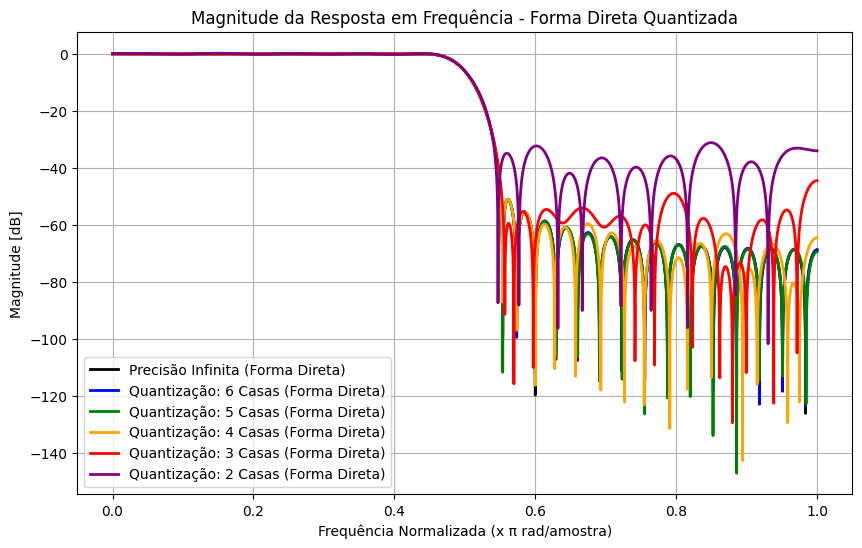

In [18]:
# Atualizar os níveis de quantização para incluir 2 casas decimais
niveis_quantizacao = [None, 6, 5, 4, 3, 2]
cores = ['black', 'blue', 'green', 'orange', 'red', 'purple']
titulos = [
    "Precisão Infinita (Forma Direta)",
    "Quantização: 6 Casas (Forma Direta)",
    "Quantização: 5 Casas (Forma Direta)",
    "Quantização: 4 Casas (Forma Direta)",
    "Quantização: 3 Casas (Forma Direta)",
    "Quantização: 2 Casas (Forma Direta)"
]

# Criar a figura para um único gráfico com todas as curvas na forma direta
plt.figure(figsize=(10, 6))

for casas, cor, titulo in zip(niveis_quantizacao, cores, titulos):
    if casas is None:
        h_fir = h_fir_original  # Sem quantização
    else:
        h_fir = np.round(h_fir_original, casas)  # Aplicar arredondamento direto

    # Calcular a resposta em frequência
    w, H = signal.freqz(h_fir, worN=8000)
    magnitude_H = 20 * np.log10(np.maximum(np.abs(H), 1e-10))  # Evita log(0)

    # Plotar todas as curvas em um único gráfico
    plt.plot(w / np.pi, magnitude_H, color=cor, linewidth=2, label=titulo)

# Configuração do gráfico
plt.title('Magnitude da Resposta em Frequência - Forma Direta Quantizada')
plt.xlabel('Frequência Normalizada (x π rad/amostra)')
plt.ylabel('Magnitude [dB]')
plt.grid(True)
plt.legend()
plt.show()


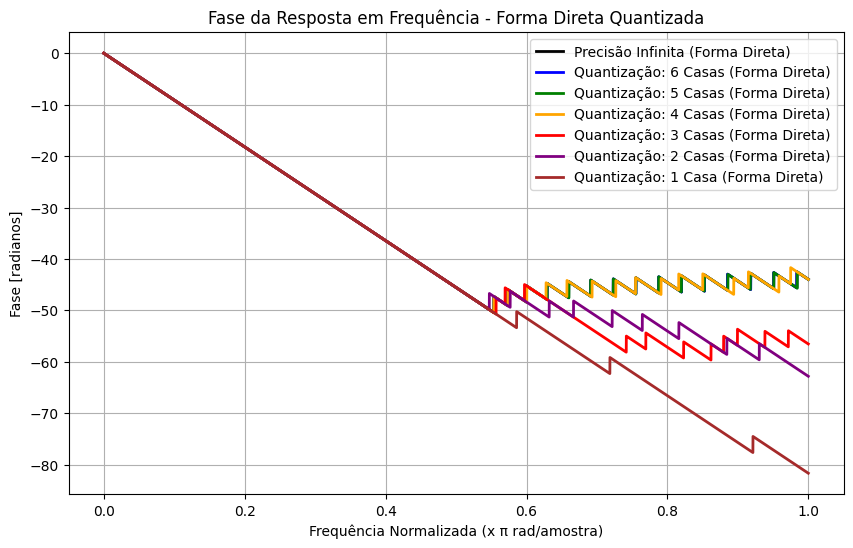

In [17]:
# Adicionar quantizações para 2 e 1 casa decimal
niveis_quantizacao = [None, 6, 5, 4, 3, 2, 1]
cores = ['black', 'blue', 'green', 'orange', 'red', 'purple', 'brown']
titulos = [
    "Precisão Infinita (Forma Direta)",
    "Quantização: 6 Casas (Forma Direta)",
    "Quantização: 5 Casas (Forma Direta)",
    "Quantização: 4 Casas (Forma Direta)",
    "Quantização: 3 Casas (Forma Direta)",
    "Quantização: 2 Casas (Forma Direta)",
    "Quantização: 1 Casa (Forma Direta)"
]

# Criar a figura para um único gráfico com todas as curvas de fase sobrepostas
plt.figure(figsize=(10, 6))

for casas, cor, titulo in zip(niveis_quantizacao, cores, titulos):
    if casas is None:
        h_fir = h_fir_original  # Sem quantização
    else:
        h_fir = np.round(h_fir_original, casas)  # Aplicar arredondamento direto

    # Calcular a resposta em frequência
    w, H = signal.freqz(h_fir, worN=8000)
    fase_H = np.unwrap(np.angle(H))  # Desfazer descontinuidades na fase

    # Plotar todas as curvas em um único gráfico
    plt.plot(w / np.pi, fase_H, color=cor, linewidth=2, label=titulo)

# Configuração do gráfico
plt.title('Fase da Resposta em Frequência - Forma Direta Quantizada')
plt.xlabel('Frequência Normalizada (x π rad/amostra)')
plt.ylabel('Fase [radianos]')
plt.grid(True)
plt.legend()
plt.show()


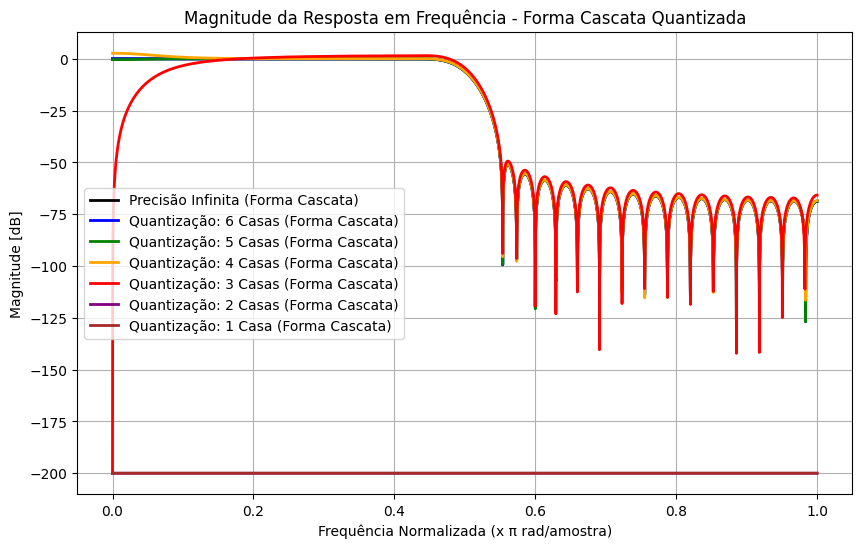

In [16]:
# Criar a figura para um único gráfico com todas as curvas e legenda
plt.figure(figsize=(10, 6))

for casas, cor, titulo in zip(niveis_quantizacao, cores, titulos):
    if casas is None:
        sos = sos_cascata_original  # Sem quantização
    else:
        sos = np.round(sos_cascata_original, casas)  # Aplicar arredondamento direto

    # Calcular a resposta em frequência
    w, H = signal.sosfreqz(sos, worN=8000)
    magnitude_H = 20 * np.log10(np.maximum(np.abs(H), 1e-10))  # Evita log(0)

    # Plotar todas as curvas em um único gráfico
    plt.plot(w / np.pi, magnitude_H, color=cor, linewidth=2, label=titulo)

# Configuração do gráfico
plt.title('Magnitude da Resposta em Frequência - Forma Cascata Quantizada')
plt.xlabel('Frequência Normalizada (x π rad/amostra)')
plt.ylabel('Magnitude [dB]')
plt.grid(True)
plt.legend()
plt.show()


### Análise da Sensibilidade à Quantização
Vamos comparar a resposta em frequência do filtro com precisão infinita e com precisão finita

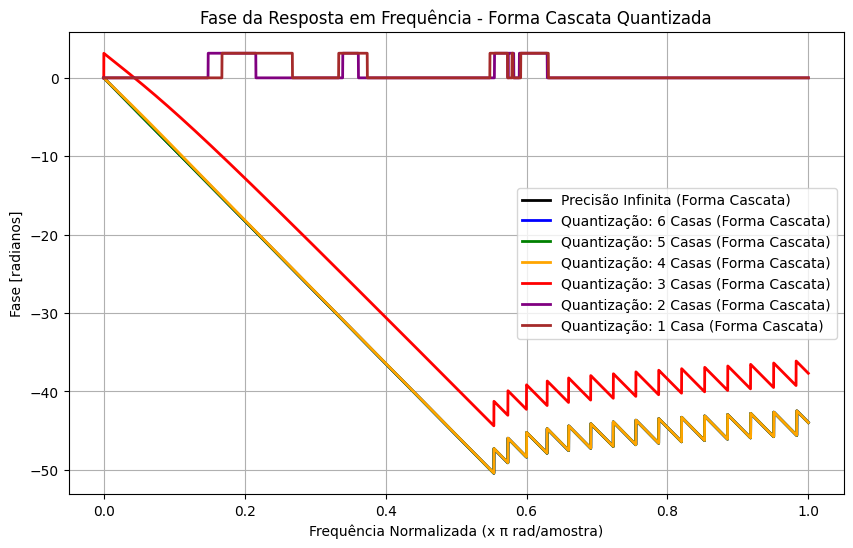

In [15]:
# Converter para forma cascata (Second-Order Sections - SOS)
sos_cascata_original = signal.tf2sos(h_fir_original, [1])

# Definir novos níveis de quantização para 6, 5, 4, 3, 2 e 1 casas decimais
niveis_quantizacao = [None, 6, 5, 4, 3, 2, 1]
cores = ['black', 'blue', 'green', 'orange', 'red', 'purple', 'brown']
titulos = [
    "Precisão Infinita (Forma Cascata)",
    "Quantização: 6 Casas (Forma Cascata)",
    "Quantização: 5 Casas (Forma Cascata)",
    "Quantização: 4 Casas (Forma Cascata)",
    "Quantização: 3 Casas (Forma Cascata)",
    "Quantização: 2 Casas (Forma Cascata)",
    "Quantização: 1 Casa (Forma Cascata)"
]

# Criar a figura para um único gráfico com todas as curvas de fase sobrepostas
plt.figure(figsize=(10, 6))

for casas, cor, titulo in zip(niveis_quantizacao, cores, titulos):
    if casas is None:
        sos = sos_cascata_original  # Sem quantização
    else:
        sos = np.round(sos_cascata_original, casas)  # Aplicar arredondamento direto

    # Calcular a resposta em frequência
    w, H = signal.sosfreqz(sos, worN=8000)
    fase_H = np.unwrap(np.angle(H))  # Desfazer descontinuidades na fase

    # Plotar todas as curvas em um único gráfico
    plt.plot(w / np.pi, fase_H, color=cor, linewidth=2, label=titulo)

# Configuração do gráfico
plt.title('Fase da Resposta em Frequência - Forma Cascata Quantizada')
plt.xlabel('Frequência Normalizada (x π rad/amostra)')
plt.ylabel('Fase [radianos]')
plt.grid(True)
plt.legend()
plt.show()


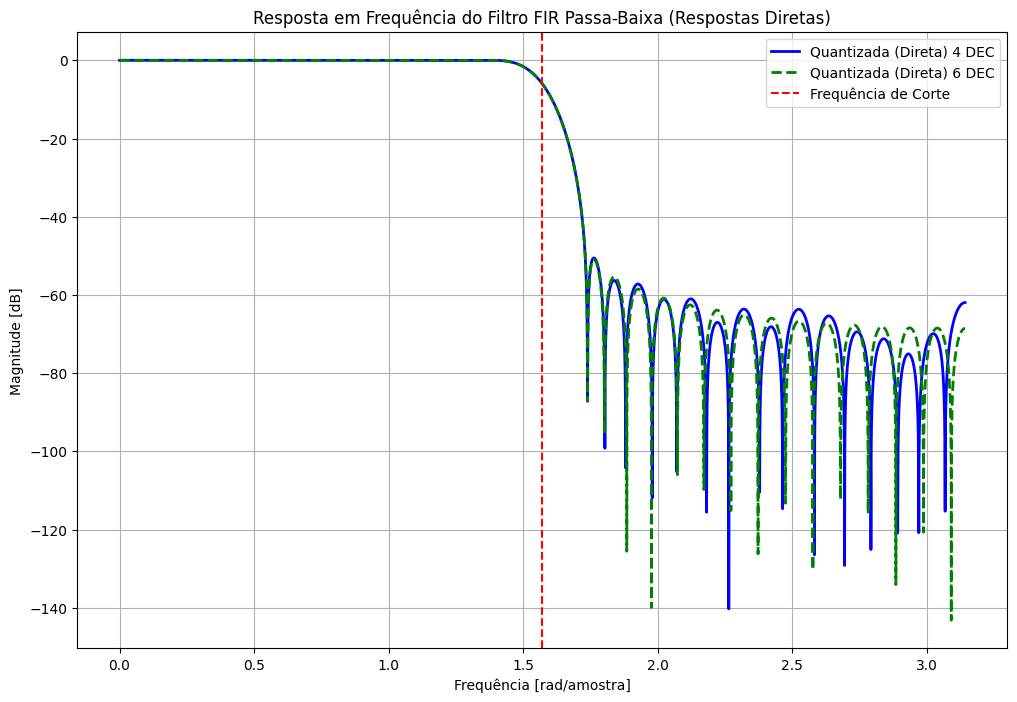

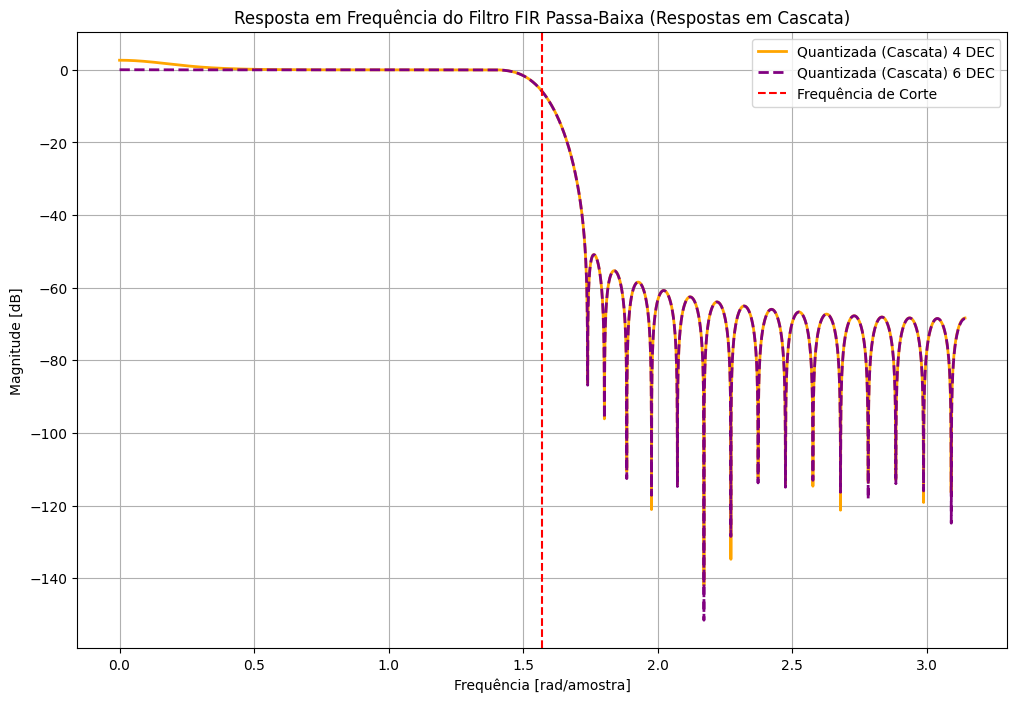

In [ ]:
# Quantização dos coeficientes (exemplo: 4 casas decimais)
h_fir_quantizados_4dec = np.round(h_fir, decimals=4)

# Quantização dos coeficientes da forma em cascata (4 casas decimais)
sos_quantizados_4dec = np.round(sos, decimals=4)

# Quantização dos coeficientes (exemplo: 2 casas decimais)
h_fir_quantizados_6dec = np.round(h_fir, decimals=6)

# Quantização dos coeficientes da forma em cascata (2 casas decimais)
sos_quantizados_6dec = np.round(sos, decimals=6)

# Resposta em frequência para a forma direta quantizada
frequencias_q_4dec, resposta_direta_quantizada_4dec = signal.freqz(h_fir_quantizados_4dec, worN=8000)
frequencias_q_2dec, resposta_direta_quantizada_2dec = signal.freqz(h_fir_quantizados_6dec, worN=8000)

# Resposta em frequência para a forma em cascata quantizada
frequencias_q_sos_4dec, resposta_cascata_quantizada_4dec = signal.sosfreqz(sos_quantizados_4dec, worN=8000)
frequencias_q_sos_2dec, resposta_cascata_quantizada_2dec = signal.sosfreqz(sos_quantizados_6dec, worN=8000)

# Plot das respostas em frequência (Respostas Diretas)
plt.figure(figsize=(12, 8))
plt.plot(
    frequencias_q_4dec, 20 * np.log10(np.abs(resposta_direta_quantizada_4dec)),
    label='Quantizada (Direta) 4 DEC', color='blue', linestyle='-', linewidth=2
)
plt.plot(
    frequencias_q_2dec, 20 * np.log10(np.abs(resposta_direta_quantizada_2dec)),
    label='Quantizada (Direta) 6 DEC', color='green', linestyle='--', linewidth=2
)
plt.title('Resposta em Frequência do Filtro FIR Passa-Baixa (Respostas Diretas)')
plt.xlabel('Frequência [rad/amostra]')
plt.ylabel('Magnitude [dB]')
plt.grid(True)
plt.axvline(frequencia_corte, color='red', linestyle='--', label='Frequência de Corte')
plt.legend()
plt.show()

# Plot das respostas em frequência (Respostas em Cascata)
plt.figure(figsize=(12, 8))
plt.plot(
    frequencias_q_sos_4dec, 20 * np.log10(np.abs(resposta_cascata_quantizada_4dec)),
    label='Quantizada (Cascata) 4 DEC', color='orange', linestyle='-', linewidth=2
)
plt.plot(
    frequencias_q_sos_2dec, 20 * np.log10(np.abs(resposta_cascata_quantizada_2dec)),
    label='Quantizada (Cascata) 6 DEC', color='purple', linestyle='--', linewidth=2
)
plt.title('Resposta em Frequência do Filtro FIR Passa-Baixa (Respostas em Cascata)')
plt.xlabel('Frequência [rad/amostra]')
plt.ylabel('Magnitude [dB]')
plt.grid(True)
plt.axvline(frequencia_corte, color='red', linestyle='--', label='Frequência de Corte')
plt.legend()
plt.show()

### Precisão infinita vs Precisão finita

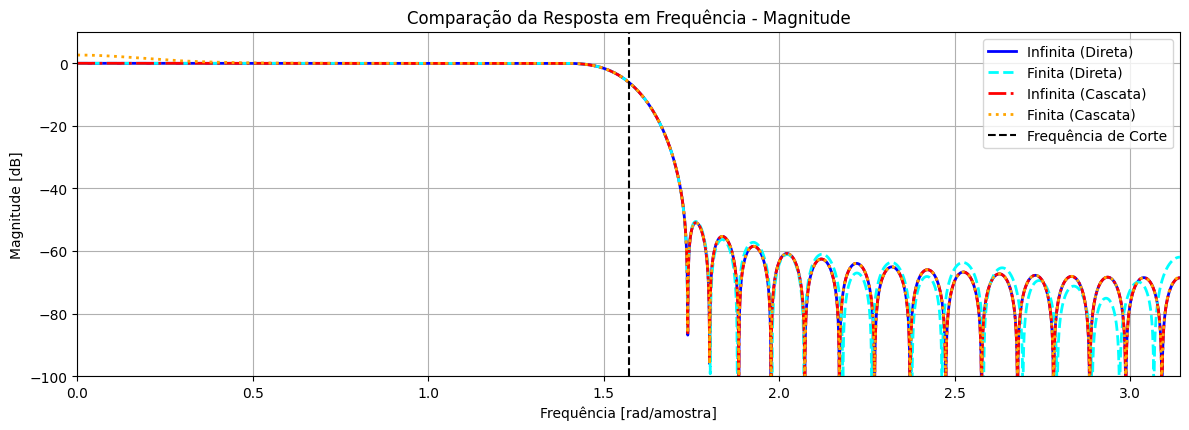

In [ ]:
# Resposta em frequência para a forma direta (precisão infinita)
frequencias_inf, resposta_direta_inf = signal.freqz(h_fir, worN=8000)

# Resposta em frequência para a forma direta (precisão finita)
frequencias_fin, resposta_direta_fin = signal.freqz(h_fir_quantizados_4dec, worN=8000)

# Resposta em frequência para a forma em cascata (precisão infinita)
frequencias_inf_sos, resposta_cascata_inf = signal.sosfreqz(sos, worN=8000)

# Resposta em frequência para a forma em cascata (precisão finita)
frequencias_fin_sos, resposta_cascata_fin = signal.sosfreqz(sos_quantizados_4dec, worN=8000)


# Plot da resposta em magnitude
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(
    frequencias_inf, 20 * np.log10(np.abs(resposta_direta_inf)),
    label='Infinita (Direta)', color='blue', linestyle='-', linewidth=2
)
plt.plot(
    frequencias_fin, 20 * np.log10(np.abs(resposta_direta_fin)),
    label='Finita (Direta)', color='cyan', linestyle='--', linewidth=2
)
plt.plot(
    frequencias_inf_sos, 20 * np.log10(np.abs(resposta_cascata_inf)),
    label='Infinita (Cascata)', color='red', linestyle='-.', linewidth=2
)
plt.plot(
    frequencias_fin_sos, 20 * np.log10(np.abs(resposta_cascata_fin)),
    label='Finita (Cascata)', color='orange', linestyle=':', linewidth=2
)
plt.title('Comparação da Resposta em Frequência - Magnitude')
plt.xlabel('Frequência [rad/amostra]')
plt.ylabel('Magnitude [dB]')
plt.grid(True)
plt.axvline(frequencia_corte, color='black', linestyle='--', label='Frequência de Corte')
plt.legend()

# Ajustar limites dos eixos (opcional)
plt.ylim(-100, 10)  # Ajuste os valores conforme necessário
plt.xlim(0, np.pi)  # Limita o eixo x ao intervalo [0, π] para frequências normalizadas

plt.tight_layout()  # Melhora o espaçamento entre subplots
plt.show()



Com base nos gráficos analisados, podemos concluir que a forma direta de implementação de filtros FIR é significativamente mais sensível à quantização dos coeficientes, ou seja, à redução do número de casas decimais. Isso se deve ao fato de que pequenas alterações nos coeficientes afetam diretamente a resposta em frequência do filtro, resultando em mudanças perceptíveis na magnitude. Por outro lado, a forma em cascata demonstrou maior robustez à quantização, mantendo uma resposta em frequência mais estável mesmo com a redução do número de casas decimais. Essa diferença ocorre porque a estrutura em cascata divide o filtro em seções de segunda ordem, limitando a propagação de erros e tornando-a mais adequada para implementações em sistemas com precisão finita. Portanto, a forma em cascata é preferível em aplicações práticas onde a quantização dos coeficientes é inevitável.



### Transformações em frequência


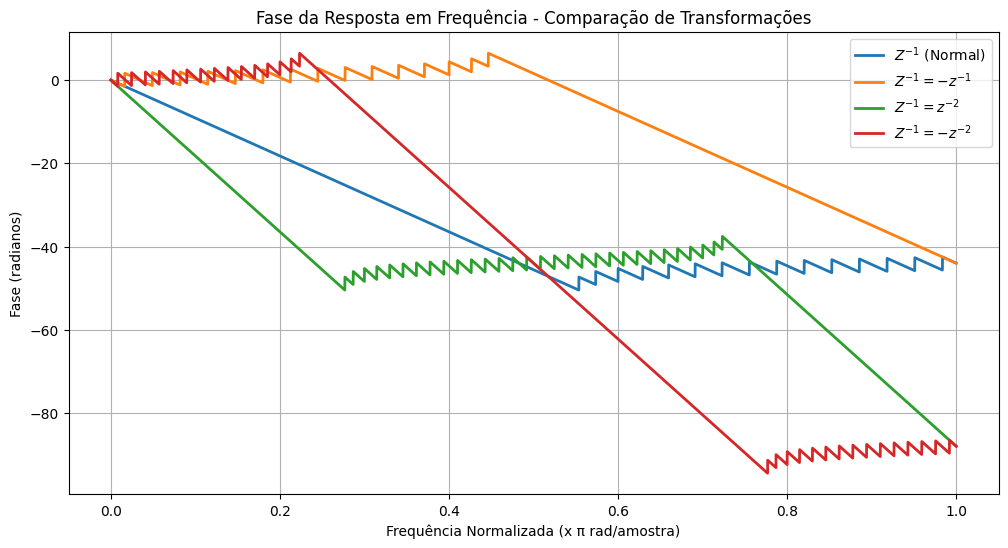

In [ ]:
# Reimportar as bibliotecas após o reset do estado
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Parâmetros do filtro
atenuacao_desejada = 50  # dB
frequencia_corte = np.pi / 2  # ωc = π/2
largura_transicao = 0.1 * np.pi  # Δω < 0,1π

# Cálculo do parâmetro β
beta = 0.5842 * (atenuacao_desejada - 21) ** 0.4 + 0.07886 * (atenuacao_desejada - 21)

# Cálculo da ordem M do filtro (num_taps)
M = int(np.ceil((atenuacao_desejada - 8) / (2.285 * largura_transicao)))

# Projeta o filtro FIR
h_fir = signal.firwin(M, frequencia_corte/np.pi, window=('kaiser', beta), scale=False)

# Função para aplicar as transformações no filtro FIR
def transformar_filtro1(h_fir, transformacao):
    if transformacao == 1:
        # Z^{-1} = -z^{-1}
        return h_fir * (-1) ** np.arange(len(h_fir))
    elif transformacao == 2:
        # Z^{-1} = z^{-2}
        novos_h_fir = np.zeros(2 * len(h_fir) - 1)
        novos_h_fir[::2] = h_fir
        return novos_h_fir
    elif transformacao == 3:
        # Z^{-1} = -z^{-2}
        novos_h_fir = np.zeros(2 * len(h_fir) - 1)
        novos_h_fir[::2] = h_fir * (-1) ** np.arange(len(h_fir))
        return novos_h_fir

# Definir as transformações aplicadas ao filtro
transformacoes = [
    (r'$Z^{-1}$ (Normal)', h_fir),
    (r'$Z^{-1} = -z^{-1}$', transformar_filtro1(h_fir, 1)),
    (r'$Z^{-1} = z^{-2}$', transformar_filtro1(h_fir, 2)),
    (r'$Z^{-1} = -z^{-2}$', transformar_filtro1(h_fir, 3))
]

# Criar o gráfico com todas as fases das transformações
plt.figure(figsize=(12, 6))

for nome, h_transf in transformacoes:
    w_transf, resposta_transformada = signal.freqz(h_transf, worN=8000)
    fase_resposta = np.unwrap(np.angle(resposta_transformada))  # Corrigir descontinuidades
    plt.plot(w_transf / np.pi, fase_resposta, label=nome, linewidth=2)

# Configuração do gráfico
plt.title('Fase da Resposta em Frequência - Comparação de Transformações')
plt.xlabel('Frequência Normalizada (x π rad/amostra)')
plt.ylabel('Fase (radianos)')
plt.grid(True)
plt.legend()
plt.show()


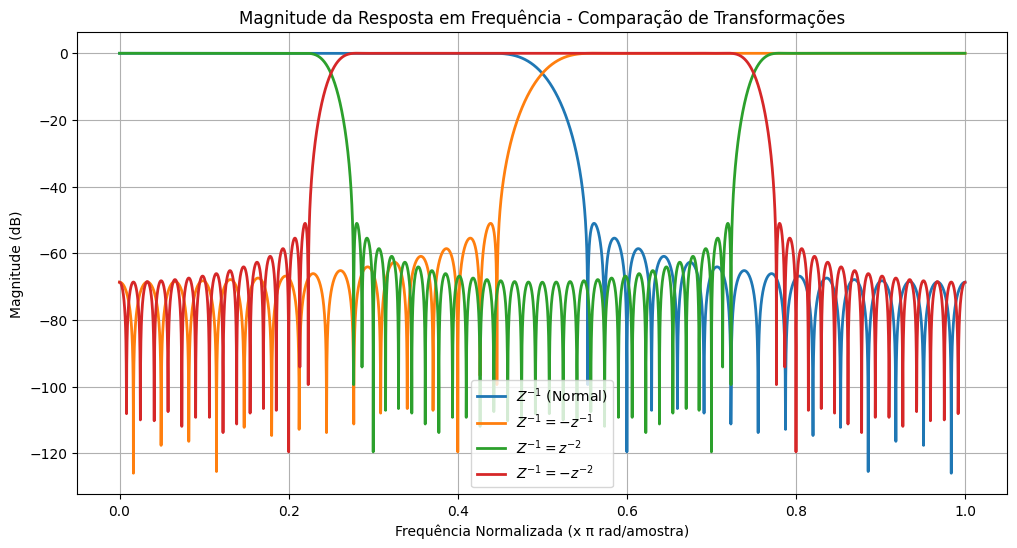

In [5]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Parâmetros do filtro FIR
M = 59  # Ordem do filtro
frequencia_corte = 0.5 * np.pi  # Frequência de corte normalizada
beta = 4.55  # Parâmetro da janela de Kaiser (corrigido)

# Criar o filtro FIR
h_fir = signal.firwin(M, frequencia_corte/np.pi, window=('kaiser', beta), scale=False)

# Função para aplicar transformações no filtro FIR
def transformar_filtro1(h_fir, transformacao):
    if transformacao == 1:
        # Z^{-1} = -z^{-1}
        return h_fir * (-1) ** np.arange(len(h_fir))
    elif transformacao == 2:
        # Z^{-1} = z^{-2}
        novos_h_fir = np.zeros(2 * len(h_fir) - 1)
        novos_h_fir[::2] = h_fir
        return novos_h_fir
    elif transformacao == 3:
        # Z^{-1} = -z^{-2}
        novos_h_fir = np.zeros(2 * len(h_fir) - 1)
        novos_h_fir[::2] = h_fir * (-1) ** np.arange(len(h_fir))
        return novos_h_fir

# Aplicar as transformações no filtro
transformacoes = [
    (r'$Z^{-1}$ (Normal)', h_fir),
    (r'$Z^{-1} = -z^{-1}$', transformar_filtro1(h_fir, 1)),
    (r'$Z^{-1} = z^{-2}$', transformar_filtro1(h_fir, 2)),
    (r'$Z^{-1} = -z^{-2}$', transformar_filtro1(h_fir, 3))
]

# Criar o gráfico com todas as magnitudes
plt.figure(figsize=(12, 6))

for nome, h_transf in transformacoes:
    w_transf, resposta_transformada = signal.freqz(h_transf, worN=8000)
    magnitude_resposta = np.abs(resposta_transformada)  # Obter a magnitude
    plt.plot(w_transf / np.pi, 20 * np.log10(magnitude_resposta), label=nome, linewidth=2)  # Em dB

# Configuração do gráfico
plt.title('Magnitude da Resposta em Frequência - Comparação de Transformações')
plt.xlabel('Frequência Normalizada (x π rad/amostra)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)
plt.legend()
plt.show()


### Resultados
